In [15]:
#Compare runtime of drama vs comedy movie distributions, imdb dataset
import pandas as pd
import random
from scipy import stats

#Get random data from 1% of the file
readProportion = 0.01
data = pd.read_table('https://datasets.imdbws.com/title.basics.tsv.gz',
                    header=0, skiprows=lambda i: i > 0 and random.random() > readProportion,
                    sep='\t')
data = data.sample(frac=1)
#Rids empty entries
dataFull = data[data.runtimeMinutes != r'\N'].copy()
#Converts runtime minutes from string to int
dataFull.loc[:, 'runtimeMinutes'] = dataFull.runtimeMinutes.astype(int)
#Movies, ignoring outliers
movies = dataFull[(dataFull.titleType == 'movie') & (dataFull.runtimeMinutes < 400)]

In [16]:
#Filtering dramas
drama = movies[movies.genres.str.contains('Drama')]

In [17]:
#Filtering comedies
comedy = movies[movies.genres.str.contains('Comedy')]

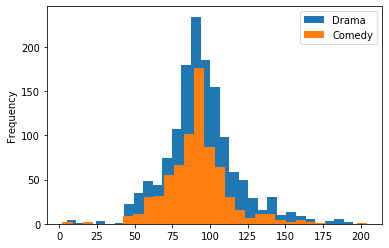

In [18]:
#Plot series as histograms
dramaMins = drama.runtimeMinutes.copy()
comedyMins = comedy.runtimeMinutes.copy()
#both = pd.concat([dramaMins, comedyMins],ignore_index=True, axis=1)
dramaMins.plot.hist(bins=30, label='Drama', legend=True)
comedyMins.plot.hist(bins=30, label='Comedy', legend=True)

In [19]:
#2 sample t-test
[statisticInclude, pvalueInclude] = stats.ttest_ind(dramaMins, comedyMins)
print(f'test statistic: {statisticInclude}, p-value: {pvalueInclude}')

test statistic: 2.778357810486439, p-value: 0.005511018394724771


In [20]:
#Filtering only dramas
dramaOnly = movies[movies.genres == 'Drama']

In [21]:
#Filtering only comedies
comedyOnly = movies[movies.genres == 'Comedy']

Drama only mean runtime: 92.31818181818181
Comedy only mean runtime: 90.392


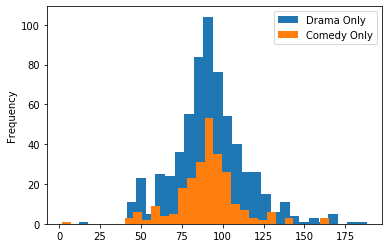

In [22]:
#Plot series as histograms
dramaOnlyMins = dramaOnly.runtimeMinutes.copy()
comedyOnlyMins = comedyOnly.runtimeMinutes.copy()
#both = pd.concat([dramaMins, comedyMins],ignore_index=True, axis=1)
dramaOnlyMins.plot.hist(bins=30, label='Drama Only', legend=True)
comedyOnlyMins.plot.hist(bins=30, label='Comedy Only', legend=True)
print('Drama only mean runtime:', dramaOnlyMins.mean())
print('Comedy only mean runtime:', comedyOnlyMins.mean())

In [23]:
#2 sample t-test
[statisticOnly, pvalueOnly] = stats.ttest_ind(dramaOnlyMins, comedyOnlyMins)
print(f'test statistic: {statisticOnly}, p-value: {pvalueOnly}')

test statistic: 1.1889029631451145, p-value: 0.23479639907741892
